Import section

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
g1 = pd.read_csv("g1.csv")
g1.head()

,Time,Source,Destination,Protocol,Country,Region,City,Org,Longitude,Latitude,Connection,Length,ARTT
0,2024-08-19 11:45:20,162.249.72.4,192.168.1.19,UDP,US,California,Los Angeles,"AS6507 Riot Games, Inc",-118.448700,34.044700,ADSL,21415,64
1,2024-08-19 11:45:20,192.168.1.19,162.249.72.4,UDP,EG,Cairo,Cairo,Etisalat,30.048255,31.233643,ADSL,4278,66
2,2024-08-19 11:45:21,162.249.72.4,192.168.1.19,UDP,US,California,Los Angeles,"AS6507 Riot Games, Inc",-118.448700,34.044700,ADSL,485,63
3,2024-08-19 11:45:21,192.168.1.19,162.249.72.4,UDP,EG,Cairo,Cairo,Etisalat,30.048255,31.233643,ADSL,500,66
4,2024-08-19 11:45:22,162.249.72.4,192.168.1.19,UDP,US,California,Los Angeles,"AS6507 Riot Games, Inc",-118.448700,34.044700,ADSL,120,63


In [3]:
g1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4158 entries, 0 to 4157
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time         4158 non-null   object 
 1   Source       4158 non-null   object 
 2   Destination  4158 non-null   object 
 3   Protocol     4158 non-null   object 
 4   Country      4158 non-null   object 
 5   Region       4158 non-null   object 
 6   City         4158 non-null   object 
 7   Org          4158 non-null   object 
 8   Longitude    4158 non-null   float64
 9   Latitude     4158 non-null   float64
 10  Connection   4158 non-null   object 
 11  Length       4158 non-null   int64  
 12  ARTT         4158 non-null   int64  
dtypes: float64(2), int64(2), object(9)
memory usage: 422.4+ KB


In [4]:
g1.describe()

,Longitude,Latitude,Length,ARTT
count,4158.000000,4158.000000,4158.000000,4158.000000
mean,-44.271650,32.640523,5570.127946,64.520683
std,74.257373,1.405697,8239.170569,1.024093
min,-118.448700,31.233643,69.000000,60.000000
25%,-118.448700,31.233643,1450.250000,64.000000
50%,-118.448700,34.044700,2453.000000,65.000000
75%,30.048255,34.044700,4634.500000,65.000000
max,30.048255,34.044700,67557.000000,70.000000


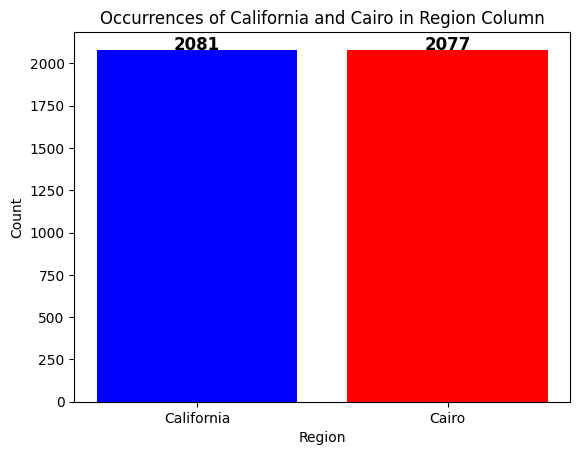

In [5]:
# Count occurrences
region_counts = g1["Region"].value_counts()
california_count = region_counts.get("California", 0)
cairo_count = region_counts.get("Cairo", 0)

# Data for the bar chart
regions = ["California", "Cairo"]
counts = [california_count, cairo_count]

# Plot
plt.bar(regions, counts, color=["blue", "red"])

# Add text on bars
for i, count in enumerate(counts):
    plt.text(i, count + 1, str(count), ha='center', fontsize=12, fontweight='bold')

# Labels and title
plt.xlabel("Region")
plt.ylabel("Count")
plt.title("Occurrences of California and Cairo in Region Column")

plt.show()


In [6]:
g1["City"].value_counts()

City
Los Angeles    2081
Cairo          2077
Name: count, dtype: int64

In [7]:
g1["Org"].value_counts()

Org
AS6507 Riot Games, Inc    2081
Etisalat                  2077
Name: count, dtype: int64

In [8]:
g1["Connection"].value_counts()

Connection
ADSL    4158
Name: count, dtype: int64

In [9]:
g1["Protocol"].value_counts()

Protocol
UDP    4158
Name: count, dtype: int64

In [10]:
g1["Country"].value_counts()

Country
US    2081
EG    2077
Name: count, dtype: int64

In [11]:
g1.head(2)

,Time,Source,Destination,Protocol,Country,Region,City,Org,Longitude,Latitude,Connection,Length,ARTT
0,2024-08-19 11:45:20,162.249.72.4,192.168.1.19,UDP,US,California,Los Angeles,"AS6507 Riot Games, Inc",-118.448700,34.044700,ADSL,21415,64
1,2024-08-19 11:45:20,192.168.1.19,162.249.72.4,UDP,EG,Cairo,Cairo,Etisalat,30.048255,31.233643,ADSL,4278,66


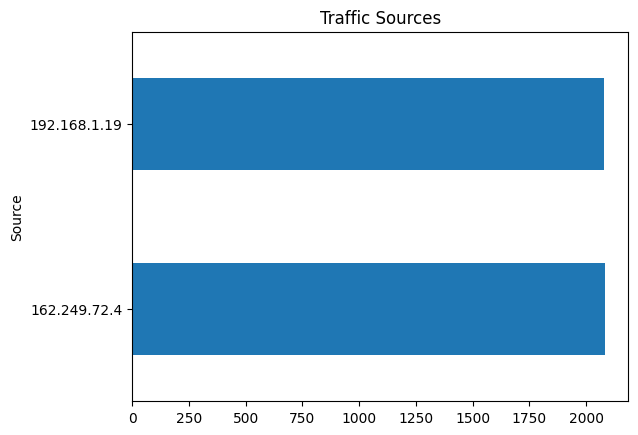

In [12]:
g1["Source"].value_counts().head(10).plot(kind="barh", title="Traffic Sources")
plt.show()


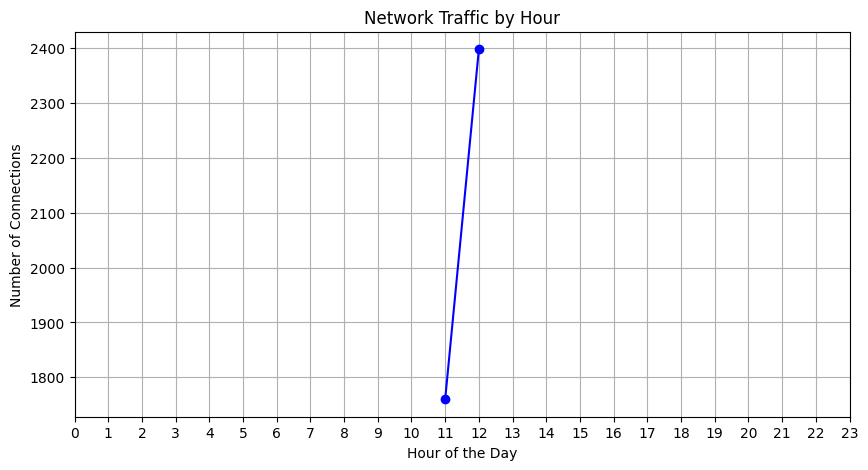

In [13]:
g1["Time"] = pd.to_datetime(g1["Time"])
# Group by hour and count occurrences
g1["Hour"] = g1["Time"].dt.hour
hourly_counts = g1["Hour"].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(hourly_counts.index, hourly_counts.values, marker="o", linestyle="-", color="b")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Connections")
plt.title("Network Traffic by Hour")
plt.xticks(range(0, 24))  # Show all hours from 0 to 23
plt.grid(True)
plt.show()


Analyzing a single file is insufficient for a comprehensive traffic analysis; combining multiple datasets provides deeper insights into trends and patterns.
